In [29]:
%matplotlib inline
import urllib
import gzip
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#downloaded files locally due to possible website downtime 
#DOWNLOAD_ROOT = "https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/"


In [30]:
#all variables below for local file directory on my laptop

In [31]:
#All Storm Details
storm_details_2008 = pd.read_csv('StormEvents_details-ftp_v1.0_d2008_c20180718.csv.gz')
storm_details_2009 = pd.read_csv('StormEvents_details-ftp_v1.0_d2009_c20180718.csv.gz')
storm_details_2010 = pd.read_csv('StormEvents_details-ftp_v1.0_d2010_c20191116.csv.gz')
storm_details_2011 = pd.read_csv('StormEvents_details-ftp_v1.0_d2011_c20180718.csv.gz')
storm_details_2012 = pd.read_csv('StormEvents_details-ftp_v1.0_d2012_c20190516.csv.gz')
storm_details_2013 = pd.read_csv('StormEvents_details-ftp_v1.0_d2013_c20170519.csv.gz')
storm_details_2014 = pd.read_csv('StormEvents_details-ftp_v1.0_d2014_c20191116.csv.gz')
storm_details_2015 = pd.read_csv('StormEvents_details-ftp_v1.0_d2015_c20191116.csv.gz')
storm_details_2016 = pd.read_csv('StormEvents_details-ftp_v1.0_d2016_c20190817.csv.gz')
storm_details_2017 = pd.read_csv('StormEvents_details-ftp_v1.0_d2017_c20190817.csv.gz')
storm_details_2018 = pd.read_csv('StormEvents_details-ftp_v1.0_d2018_c20191116.csv.gz')
                

In [34]:
#sort storm details by date
#2008
storm_details_2008 = storm_details_2008.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])
#2009
storm_details_2009 = storm_details_2009.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])
#2010
storm_details_2010 = storm_details_2010.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])
#2011
storm_details_2011 = storm_details_2011.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])
#2012
storm_details_2012 = storm_details_2012.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])
#2013
storm_details_2013 = storm_details_2013.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])
#2014
storm_details_2014 = storm_details_2014.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])
#2015
storm_details_2015 = storm_details_2015.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])
#2016
storm_details_2016 = storm_details_2016.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])
#2017
storm_details_2017 = storm_details_2017.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])
#2018
storm_details_2018 = storm_details_2018.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])

In [35]:
#combine into one dataframe
def combined_storm_details(storm_details_2008, storm_details_2009, storm_details_2010, storm_details_2011, storm_details_2012, storm_details_2013, storm_details_2014, storm_details_2015, storm_details_2016, storm_details_2017, storm_details_2018):
    combined_details = pd.concat([storm_details_2008, storm_details_2009, storm_details_2010, storm_details_2011, storm_details_2012, storm_details_2013, storm_details_2014, storm_details_2015, storm_details_2016, storm_details_2017, storm_details_2018])
    return combined_details.drop_duplicates()

combined_details = combined_storm_details(storm_details_2008, storm_details_2009, storm_details_2010, storm_details_2011, storm_details_2012, storm_details_2013, storm_details_2014, storm_details_2015, storm_details_2016, storm_details_2017, storm_details_2018)

In [36]:
event_dic = {}
event_list = []
for line in combined_details['EVENT_TYPE']:
    if line not in event_list:
        event_list.append(line)
        event_dic[line] = 0
        
for line in combined_details['EVENT_TYPE']:
    if line in event_dic:
        event_dic[line] += 1
        

event_dic = sorted(event_dic.items(), key = 
             lambda kv:(kv[1], kv[0]))

In [37]:
def weather_type_occurences():
    occur = []
    types = []
    for key in list(reversed(list(event_dic)))[0:10]:
        types.append(key[0])
        occur.append(key[1])

    bars = types
    height = occur

    plt.barh(bars, height)
    plt.title('Top 10 Weather Types')
    plt.xlabel('Occurences')
    plt.ylabel('Event Types')

    plt.show()

In [38]:
def injury_by_state():

    injury_details = combined_details[["STATE", "INJURIES_INDIRECT", "INJURIES_DIRECT"]]

    states_list = []
    injury_dict = {}
    for index, row in injury_details.iterrows():
        if row['STATE'] not in states_list:
            states_list.append(row['STATE'])
            injury_dict[row['STATE']] = 0


    for index, row in injury_details.iterrows():
        total = row['INJURIES_INDIRECT'] + row['INJURIES_DIRECT']
        injury_dict[row['STATE']] += total
    

    injury_dict_sorted = sorted(injury_dict.items(), key = 
                 lambda kv:(kv[1], kv[0]))

    injuries = []
    states = []
    for key in list(reversed(list(injury_dict_sorted)))[0:10]:
        states.append(key[0])
        injuries.append(key[1])

    bars = states
    height = injuries

    plt.barh(bars, height)
    plt.title('Injuries by Weather by States')
    plt.xlabel('Number of Injuries')
    plt.ylabel('States')

    plt.show()

In [39]:
def death_by_state():
    death_details = combined_details[["STATE", "DEATHS_INDIRECT", "DEATHS_DIRECT"]]

    death_states_list = []
    death_dict = {}
    for index, row in death_details.iterrows():
        if row['STATE'] not in death_states_list:
            death_states_list.append(row['STATE'])
            death_dict[row['STATE']] = 0


    for index, row in death_details.iterrows():
        total = row['DEATHS_INDIRECT'] + row['DEATHS_DIRECT']
        death_dict[row['STATE']] += total

    death_dict_sorted = sorted(death_dict.items(), key = 
                 lambda kv:(kv[1], kv[0]))

    deaths = []
    death_states = []
    for key in list(reversed(list(death_dict_sorted)))[0:10]:
        death_states.append(key[0])
        deaths.append(key[1])

    bars = death_states
    height = deaths

    plt.barh(bars, height)
    plt.title('Deaths by Weather by States')
    plt.xlabel('Number of Deaths')
    plt.ylabel('States')

    plt.show()

In [40]:
def injury_by_weather():
    
    injury_details_year = combined_details[["YEAR", "INJURIES_INDIRECT", "INJURIES_DIRECT"]]

    year_list = []
    year_injury_dict = {}
    for index, row in injury_details_year.iterrows():
        if row['YEAR'] not in year_list:
            year_list.append(row['YEAR'])
            year_injury_dict[row['YEAR']] = 0


    for index, row in injury_details_year.iterrows():
        total = row['INJURIES_INDIRECT'] + row['INJURIES_DIRECT']
        year_injury_dict[row['YEAR']] += total
    
    injuries_total = []
    for key in year_injury_dict:
        injuries_total.append(year_injury_dict[key])

    plt.plot(year_list,injuries_total)
    plt.title('Injuries by Weather Over Time')
    plt.xlabel('Years')
    plt.ylabel('Number of Injuries')

    plt.show()

In [41]:
def death_by_weather():
    death_details_year = combined_details[["YEAR", "DEATHS_INDIRECT", "DEATHS_DIRECT"]]

    year_death_states_list = []
    year_death_dict = {}
    
    for index, row in death_details_year.iterrows():
        if row['YEAR'] not in year_death_states_list:
            year_death_states_list.append(row['YEAR'])
            year_death_dict[row['YEAR']] = 0


    for index, row in death_details_year.iterrows():
        total = row['DEATHS_INDIRECT'] + row['DEATHS_DIRECT']
        year_death_dict[row['YEAR']] += total

    death_total = []
    for key in year_death_dict:
        death_total.append(year_death_dict[key])

    plt.plot(year_death_states_list,death_total)
    plt.title('Death by Weather Over Time')
    plt.xlabel('Years')
    plt.ylabel('Number of Death')

    plt.show()

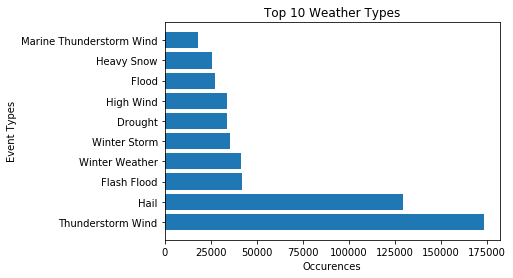

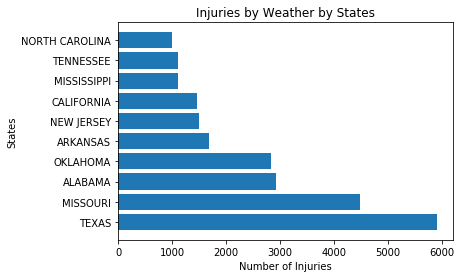

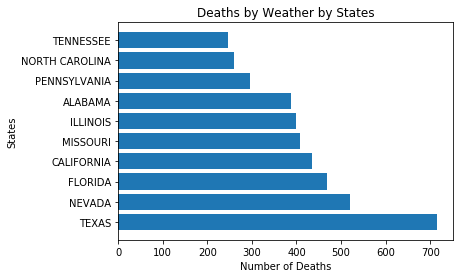

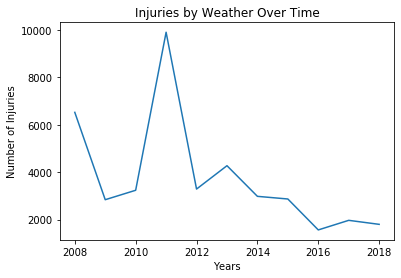

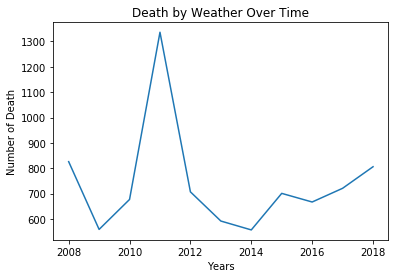

In [42]:
weather_type_occurences()
injury_by_state()
death_by_state()
injury_by_weather()
death_by_weather()